In [11]:
import numpy as np
import pandas as pd
import scipy.stats as spstat
dataDir     = './data/'

import pandas as pd
#pack E field DF
# Manually defined headers based on the sample you provided
headers = [
    "roll (m)", "yaw (m)", "pitch (m)", "freq (MHz)", 
    "E_x",
    "E_y",
    "E_z"
]

# Read the file using the headers and consider multiple spaces as a delimiter
file_path = "eField_9_13_23.txt"
E_df = pd.read_csv(dataDir + file_path, delim_whitespace=True, names=headers, skiprows=5)

# Convert string representation of complex numbers to actual complex numbers
def to_complex(value):
    return complex(value.replace('i', 'j'))

columns_to_convert = headers[4:]  # Last three columns based on your sample

def to_complex(value):
    if isinstance(value, str) and ('i' in value or '+' in value or '-' in value):
        return complex(value.replace('i', 'j'))
    return value


# Convert strings to complex numbers
for col in columns_to_convert:
    E_df[col] = E_df[col].apply(to_complex)

# Convert complex numbers to their magnitudes
E_df[columns_to_convert] = E_df[columns_to_convert].applymap(abs)

In [12]:
print('E_x:')
print(E_df['E_x'].mean())
print(spstat.bootstrap((E_df['E_x'].to_numpy(),), np.mean, n_resamples= 9999))

print('E_y:')
print(E_df['E_y'].mean())
print(spstat.bootstrap((E_df['E_y'].to_numpy(),), np.mean, n_resamples= 9999))

print('E_z:')
print(E_df['E_z'].mean())
print(spstat.bootstrap((E_df['E_z'].to_numpy(),), np.mean, n_resamples= 9999))

E_x:
0.4713488213416364
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.46371468546944483, high=0.4790468706379945), standard_error=0.003889622872834328)
E_y:
0.5395484396134266
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.5318066918274922, high=0.5475068170327724), standard_error=0.0040071829427707605)
E_z:
0.40578469013230867
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.3982465939086687, high=0.41336636805628457), standard_error=0.003870576728767893)


In [21]:
# Pack LPV DF

headers = [
    "roll (m)", "yaw (m)", "pitch (m)", 
    'LPV'
]

# Read the file using the headers and consider multiple spaces as a delimiter
file_path = "abs_LPV_dipoleFreespace_9_15_23.txt"
lpv_df = pd.read_csv(dataDir + file_path, delim_whitespace=True, names=headers, skiprows=5)

lpv_df.head()
np.where(lpv_df['LPV'] > 1)
lpv_df.drop(index=546, inplace=True)
lpv_df['LPV'].mean()

0.26696967211378525

In [22]:
data    = lpv_df['LPV'].to_numpy()
spstat.bootstrap((data,), np.mean, n_resamples= 9999)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.25710076120135966, high=0.27685698135907477), standard_error=0.005039894100719632)

In [36]:
####Power and aperature####
print(f'Power from comsol (95% CL): \
{np.round(0.30185**2/50 *1000, 2)}-{np.round(0.31109**2/50 *1000,2)} mW'
)


lam             = 2.99e8/62.7e6  
Z_fs            = 376 # Z free space, Ohms
m               = 1 # match
e               = 1 # efficency
p               = .5 #polarization 
theoryPower     = 1**2 * lam**2/(4*np.pi*Z_fs) * m * e * p
print(f'Power from Hill eq 45: {np.round(theoryPower * 1000, 2)} mW')
print()

####Fields and AF####
print(f'AF from comsol (95% CL): \
{np.round(1/0.30185, 2)}-{np.round(1/0.31109,2)}'
)

print(f'AF from P * 9.7/lam  (95% CL): \
{np.round(np.sqrt(3)* 9.73/lam, 2)}'
)


Power from comsol (95% CL): 1.82-1.94 mW
Power from Hill eq 45: 2.41 mW

AF from comsol (95% CL): 3.31-3.21
AF from P * 9.7/lam  (95% CL): 3.53


In [37]:
3.25/3.53 #af comsol/AF therory

0.9206798866855525

In [35]:
1.87/2.41 #power comsol/power theory


0.7759336099585062

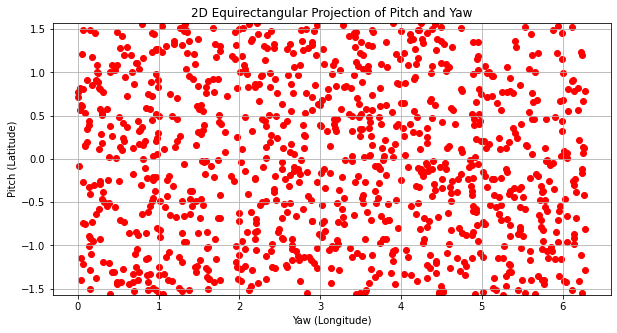

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def scatter_plot_on_sphere(pitch, yaw):
    """
    Scatter plot on 2D equirectangular projection.

    Args:
    - pitch (list or numpy array): List of pitch values in radians.
    - yaw (list or numpy array): List of yaw values in radians.

    """
    
    plt.figure(figsize=(10, 5))
    
    # The scatter plot
    plt.scatter(yaw, pitch, marker='o', c='red')
    
    # Setting the limits
    #plt.xlim([-np.pi, np.pi])
    plt.ylim([-np.pi/2, np.pi/2])
    
    # Labels and title
    plt.xlabel('Yaw (Longitude)')
    plt.ylabel('Pitch (Latitude)')
    plt.title('2D Equirectangular Projection of Pitch and Yaw')
    
    plt.grid(True)
    plt.show()

# Example usage:
pitch = np.random.uniform(-np.pi/2, np.pi/2, 1000)  # Random values between -pi/2 and pi/2
yaw = np.random.uniform(0, 2*np.pi, 1000)  # Random values between -pi and pi

scatter_plot_on_sphere(pitch, yaw)
